In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Datasets/customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Explanation (Do not run the below cell)

In [4]:
df = pd.read_csv('./Datasets/customers.csv')
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
113,114,Male,19,64,46
155,156,Female,27,78,89
118,119,Female,51,67,43
93,94,Female,40,60,40
179,180,Male,35,93,90


In [5]:
# Assume, we chose K=3, as initial number of clusters
# k1(33,14) = centroid for Cluster1
# k2(97,86) = centroid for Cluster2
# k3(76,40) = centroid for Clurter3
# d((x1,y1),(x2,y2)) = ((y2-y1)^2 + (x2-x1)^2))**(0.5)

# d(k1,(48,59)) = x  
# d(k2,(48,59)) = y 
# d(k3,(48,59)) = z
# Assume x<y and x<z => x is smallest among x,y and z
# (48,59) is assigned to cluster k1 with centroid (33,14) as x<y and x<z
# k1_new_centroid = (33+48)/2, (59+14)/2 = (81/2, 73/2) = (40.5,36.5)
# centroid of k1 is now (40.5,36.5)

#  Cluster name           - centroid           record no(row) in that cluster
# k1 {1(33,14),4(48,59)}   - 40.5,36.5           {1,4}
# k2 {2(97,86)}            - 97,86               {2}
# k3 {3(76,40)}            - 76,40               {3}


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

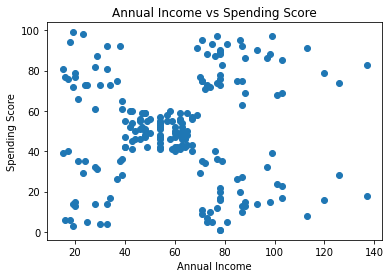

In [9]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [10]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [11]:
x = df.iloc[:,3:].values
print(type(x))

<class 'numpy.ndarray'>


In [12]:
x[:3]

array([[15, 39],
       [15, 81],
       [16,  6]], dtype=int64)

### Elbow method to determine the best K for K-Means

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [13]:
from sklearn.cluster import KMeans

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30273.394312070028, 25022.485004530332, 22225.44886242279, 19669.71099830122, 18020.16400387053, 15970.937387150669, 14545.116266433262, 13089.403266178266, 12006.471727984657, 10762.043635531129]


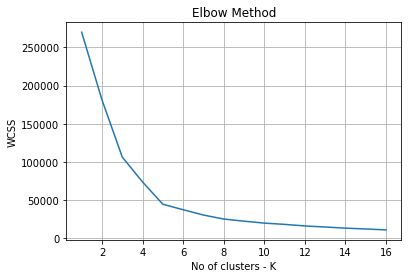

In [14]:
# wcss = within cluster sum of square distance
wcss = []
for i in range(1,17):
    clus = KMeans(n_clusters=i) # i=1,2,3,4....16
    clus.fit(x)
    wcss.append(clus.inertia_) # 
    
print(wcss)
plt.plot(range(1,17),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters - K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

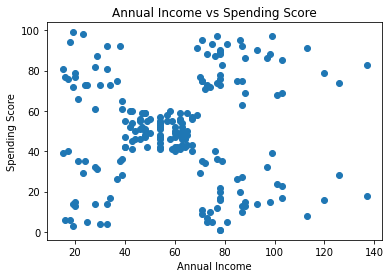

In [15]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Conslusion 
From elbow method, the optimal number of clusters turned out to be 5

#### KMeans with 5 clusters

In [16]:
clus5 = KMeans(n_clusters=5)
clus5.fit(x)

KMeans(n_clusters=5)

In [17]:
ypred5 = clus5.predict(x)
len(ypred5)

200

In [18]:
ypred5

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [19]:
cent5 = clus5.cluster_centers_
print(cent5)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


In [20]:
print(x[:7])
print(x[:7,0])
print(x[:7,1])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]]
[15 15 16 16 17 17 18]
[39 81  6 77 40 76  6]


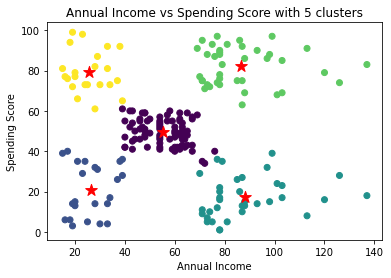

In [21]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=ypred5)
# plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='*',s=150)
plt.title('Annual Income vs Spending Score with 5 clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.legend()
plt.show()

#### KMeans with 3 clusters

In [22]:
kmean3 = KMeans(n_clusters=3)
kmean3.fit(x)

KMeans(n_clusters=3)

In [23]:
ypred3 = kmean3.predict(x)
len(ypred3)

200

In [24]:
ypred3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [25]:
cent3 = kmean3.cluster_centers_
print(cent3)

[[86.53846154 82.12820513]
 [87.         18.63157895]
 [44.15447154 49.82926829]]


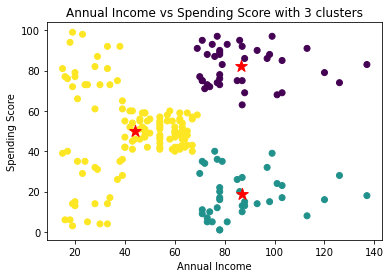

In [26]:
# plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='*',s=150)
plt.title('Annual Income vs Spending Score with 3 clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
df['Clusters3'] = ypred3
df['Clusters5'] = ypred5
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters3,Clusters5
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,1


In [28]:
df['Clusters3'].value_counts()

2    123
0     39
1     38
Name: Clusters3, dtype: int64

In [29]:
df['Clusters5'].value_counts()

0    81
3    39
2    35
1    23
4    22
Name: Clusters5, dtype: int64

In [30]:
print(kmean3.predict([[20,30]]))
print(clus5.predict([[50,60]]))

[2]
[0]


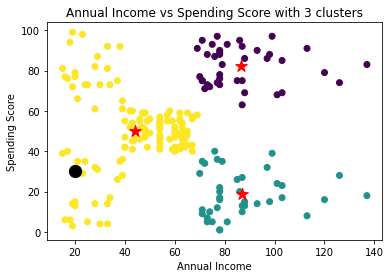

In [31]:
# plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='*',s=150)
plt.scatter(20,30,s=150,color='black')
plt.title('Annual Income vs Spending Score with 3 clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

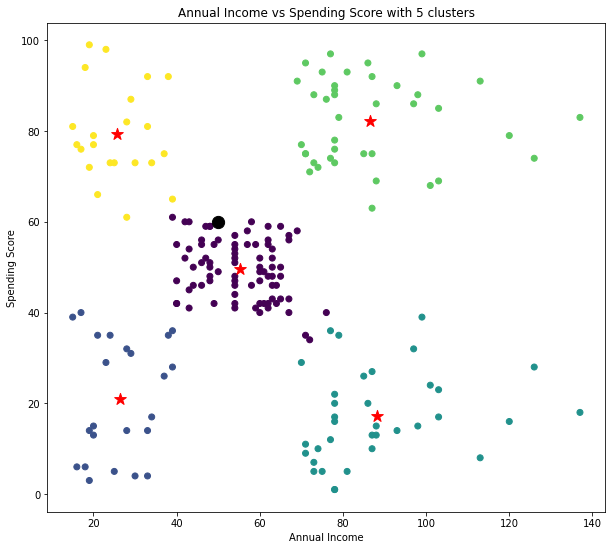

In [32]:
plt.figure(figsize=(10,9))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=ypred5)
# plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='*',s=150)
plt.scatter(50,60,s=150,color='black')
plt.title('Annual Income vs Spending Score with 5 clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.legend()
plt.show()